In [1]:
import numpy as np
# Attendance
attendance = [90, 95, 80, 85, 70, 65, 75, 50, 60, 40]
# Quiz Scores
quiz_scores = [85, 90, 80, 75, 70, 65, 80, 50, 60, 30]
# Final Grades
grades = [85, 90, 80, 75, 70, 65, 80, 50, 60, 30]

In [2]:
X = np.array([attendance, quiz_scores]).T
y = np.array(grades)

In [7]:
class Adaline:
    def __init__(self, learning_rate=0.01, max_iter=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
    
    def fit(self, X, y):
        self.weights = np.random.rand(X.shape[1] + 1)
        cost = []
        for i in range(self.max_iter):
            output = self.predict(X)
            errors = y - output
            self.weights[0] += self.learning_rate * errors.sum()
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            cost.append((errors ** 2).sum())
            if cost[-1] < 0.001:
                break
        return self
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0, 1, -1)
    
    def activation(self, X):
        return X.dot(self.weights[1:]) + self.weights[0]


In [8]:
X = np.array([attendance, quiz_scores]).T
y = np.array(grades)
model = Adaline()
model.fit(X, y)

In [11]:
new_attendance = 80
new_quiz_score = 70
new_data = np.array([new_attendance, new_quiz_score]).reshape(1, -1)
new_grade = model.predict(new_data)

print(f"Predicted grade: {new_grade[0]}")

Predicted grade: 1


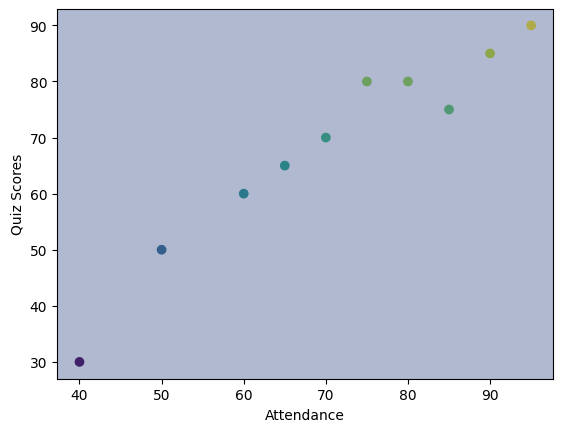

In [10]:
import matplotlib.pyplot as plt

# Plot input data
plt.scatter(attendance, quiz_scores, c=grades)
plt.xlabel("Attendance")
plt.ylabel("Quiz Scores")

# Plot decision boundary
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(np.array([attendance, quiz_scores]).T)
y = grades

# Initialize Adaline model
model = Adaline(learning_rate=0.01, max_iter=1000)

# Fit the model to the data
model.fit(X, y)

# Make predictions on new data
new_attendance = 80
new_quiz_scores = 70
X_new = scaler.transform(np.array([[new_attendance, new_quiz_scores]]))
predicted_grade = model.predict(X_new)[0]

print("Predicted grade: {}".format(predicted_grade))

Predicted grade: 1
